# Sales Analysis

## 1. Import necessary Libraries and read the files


In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Merging 12 Months of sales datas into a single CSV file

In [4]:
files = [file for file in os.listdir('/Users/trungbui0177/Desktop/Data-Analyst/SalesAnalysis/Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('/Users/trungbui0177/Desktop/Data-Analyst/SalesAnalysis/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

### Read in updated dataframe

In [5]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## 2. Clean up data

### Drop rows of NAN

In [7]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')

### Find '0r' and delete it

In [8]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Convert columns to the correct typs

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) 
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) 

## 3. Augment data with additional columns

### Add 'Month' columns -> Question 1

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2] 
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Add 'Sales' column -> Question 1

In [11]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Add 'City' column -> Question 2

In [12]:
def get_city(adress):
    return adress.split(',')[1]

def get_state(adress):
    return adress.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


### Add 'Hour' cloumn -> Question 3

In [13]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12


## 3. Business Questions

### QUESTION 1: What was the best month for sales? How much was earned that month?

In [ ]:
sum_month = all_data.groupby('Month').sum()
sum_month.head(12)

Text(0.5, 0, 'Month Number')

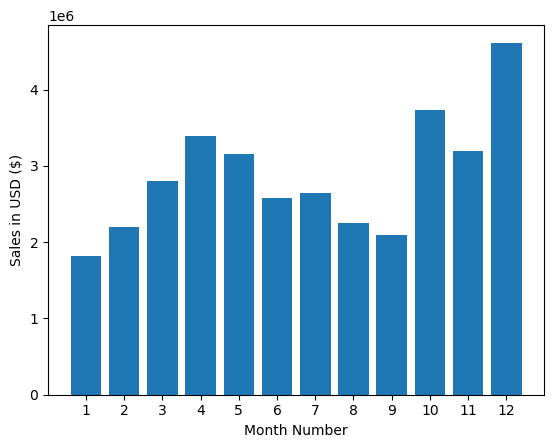

In [17]:
months = range(1,13) 

plt.bar(months, sum_month['Sales']) 
plt.xticks(months)
plt.ylabel('Sales in USD ($)') 
plt.xlabel('Month Number')

### QUESTION 2: What city had the best number of sales?

In [ ]:
sum_city = all_data.groupby('City').sum()
sum_city.head(20)

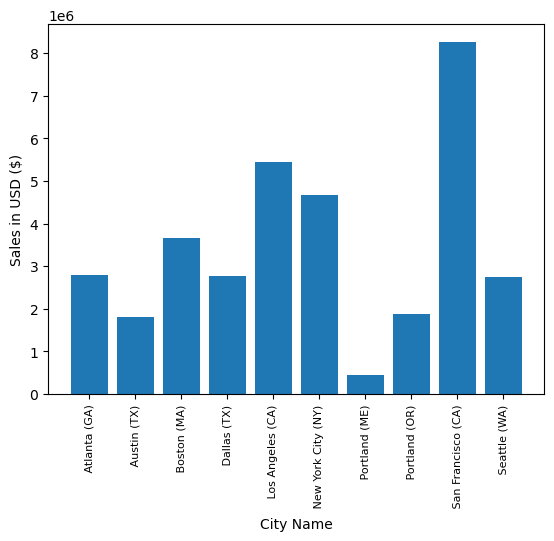

In [20]:
cities = [city for city, df in all_data.groupby('City')] 

plt.bar(cities, sum_city["Sales"]) 
plt.xticks(cities, rotation='vertical', size=8) 
plt.ylabel('Sales in USD ($)') 
plt.xlabel('City Name')

plt.show()

### QUESTION 3: What time should we display advertisements to maximize likelihood of customer's buying product?

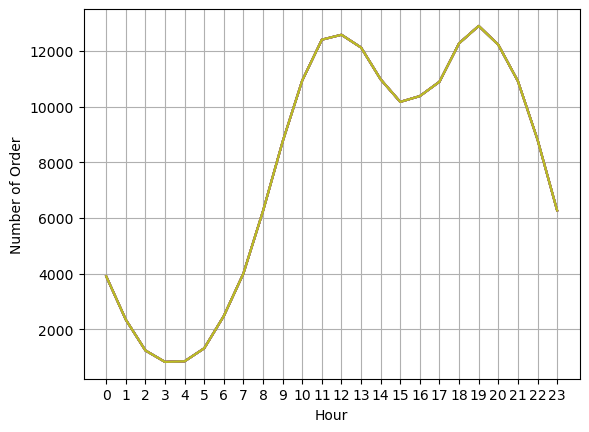

In [21]:
hours = [hour for hour, df in all_data.groupby('Hour')] 

plt.xticks(hours) 
plt.grid() 
plt.ylabel('Number of Order')
plt.xlabel('Hour')
plt.plot(hours, all_data.groupby(['Hour']).count())

plt.show()

### QUESTION 4: What products are most often sold together?

In [14]:
df = all_data[all_data['Order ID'].duplicated(keep=False)] 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) 
df = df[['Order ID', 'Grouped']].drop_duplicates() 

count = Counter() 
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) #change the parameter here for the 3,4 items
    
for key, value in count.most_common(20):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

/var/folders/dn/y4djltt91x1c5czyr65_5v140000gn/T/ipykernel_63401/1585318953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


### QUESTION 5: Which product sold the most and why?

#### 1. Which product sales the most?

In [ ]:
product_ordered = all_data.groupby('Product').sum()
products = [pro for pro, df in all_data.groupby('Product')]
quantity_ordered = product_ordered["Quantity Ordered"]
plt.bar(products, product_ordered["Quantity Ordered"], color='g') 
plt.xticks(products, rotation='vertical', size=8) 
plt.ylabel('Quantity Ordered') 
plt.xlabel('Products')

#### 2. Corelation between number of sales and prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


/var/folders/dn/y4djltt91x1c5czyr65_5v140000gn/T/ipykernel_55826/3868070372.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
/var/folders/dn/y4djltt91x1c5czyr65_5v140000gn/T/ipykernel_55826/3868070372.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

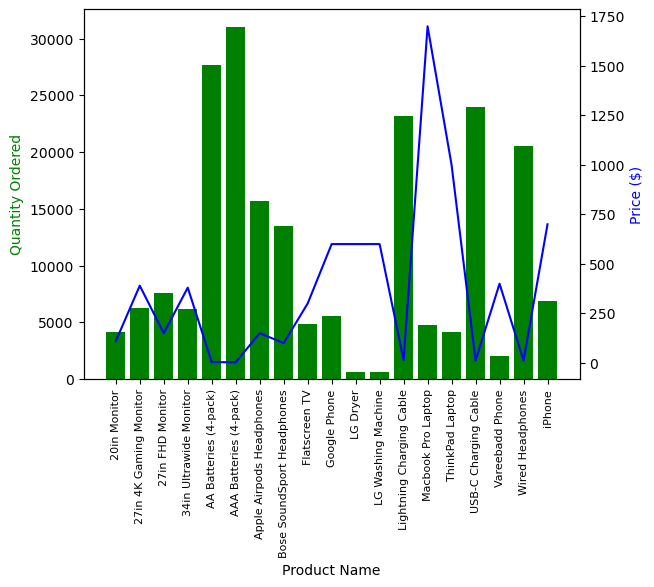

In [37]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)